In [1]:
import pandas as pd

snps_all=pd.read_csv("/oak/stanford/groups/akundaje/projects/cad/data/clint_data/rasqual_results/revisions/smc/SMC_rasqual_results_FDR_0.05_083121.txt", sep="\t", header=0)

preds = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0/snp_scores.tsv", sep="\t", header=0)

In [2]:
preds.head()
preds[snps_all.columns] = preds["META_DATA"].str.split(",", expand=True)
preds["POS1"] = preds["POS0"] + 1


sig_cols = preds.columns.tolist()

preds[sig_cols[0:2]+[sig_cols[-1]]+sig_cols[2:-1]].to_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0/snp_scores_bed_format.bed", sep="\t", header=False, index=False)

In [3]:
not_sig_preds = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0_all/snp_scores_filtered_out_non_sig_hits.tsv", sep="\t", header=0)

In [4]:
not_sig_preds[snps_all.columns[0:25]] = not_sig_preds["META_DATA"].str.split(",", expand=True)
not_sig_preds ["POS1"] = not_sig_preds ["POS0"] + 1


not_sig_cols = not_sig_preds.columns.tolist()

not_sig_preds[not_sig_cols[0:2]+[not_sig_cols[-1]]+not_sig_cols[2:-1]].to_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0_all/snp_scores_bed_format.bed", sep="\t", header=False, index=False)




In [5]:
import matplotlib.pyplot as plt

In [7]:
col_names = preds.columns

In [251]:
preds = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0/snp_scores_bed_format_inpeaks.bed", sep="\t", header=None)

preds.columns = sig_cols[0:2]+[sig_cols[-1]]+sig_cols[2:-1]

#non_sig =  pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0_all/snp_scores_bed_format_inpeaks.bed", sep="\t", header=None)
non_sig =  pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0_all/snp_scores_bed_format.bed", sep="\t", header=None)



non_sig.columns = not_sig_cols[0:2]+[not_sig_cols[-1]]+not_sig_cols[2:-1]

#non_sig = non_sig.sort_values(by = 'Log10_BH_Q').tail(20000)


print(non_sig['Log10_BH_Q'])


0        -0.785133
1        -1.869783
2        -0.340810
3        -0.471084
4        -0.525322
            ...   
236095   -0.962901
236096   -0.045387
236097   -0.052787
236098   -0.357810
236099   -0.138865
Name: Log10_BH_Q, Length: 236100, dtype: float64


In [252]:
non_sig

,CHR,POS0,POS1,REF,ALT,META_DATA,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff,Feature_ID,...,SNP_id_region,Num_feature_SNPs,Num_tested_SNPs,Num_iterations_null,Num_iterations_alt,Random_ties,Log_likelihood_null,Convergence_status,Sq_corr_fSNPs,Sq_corr_rSNP
0,chr10,100009634,100009635,T,G,"chr10.100006344.100006745,rs11592868,chr10,100...",-0.012461,-17.809502,-0.010445,chr10.100006344.100006745,...,3.275177,2,50,4,3,100009635,2.374082,0,0.982096,0.993065
1,chr10,100006779,100006780,C,T,"chr10.100008240.100008641,rs11190364,chr10,100...",-0.006151,-17.369724,-0.007709,chr10.100008240.100008641,...,2.589123,2,50,5,4,100005358,4.610132,0,0.989587,0.992047
2,chr10,100015644,100015645,T,C,"chr10.100008812.100009213,rs11593328,chr10,100...",0.082301,43.979317,0.021599,chr10.100008812.100009213,...,2.632266,1,50,4,5,100018116,1.040810,0,0.990291,0.992138
3,chr10,100015399,100015400,G,A,"chr10.100009332.100009733,rs12783181,chr10,100...",-0.038343,-19.517738,-0.010536,chr10.100009332.100009733,...,4.542324,1,50,6,5,100015400,0.429945,0,0.901012,0.991069
4,chr10,100001412,100001413,G,T,"chr10.100009818.100010219,rs12261919,chr10,100...",0.002880,13.189680,0.008494,chr10.100009818.100010219,...,5.472201,0,50,5,4,100001413,0.660478,0,NaN,0.949196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236095,chr9,99862114,99862115,T,C,"chr9.99859616.99860017,rs7024294,chr9,99862115...",0.017075,19.408478,0.009955,chr9.99859616.99860017,...,1.678031,1,13,3,3,99862115,1.642292,0,0.991061,0.992296
236096,chr9,99900932,99900933,A,T,"chr9.99906279.99906680,rs12346763,chr9,9990093...",-0.028159,-13.700563,-0.007290,chr9.99906279.99906680,...,4.319810,0,30,4,3,99900933,-0.740242,0,NaN,0.990015
236097,chr9,99907336,99907337,G,C,"chr9.99906734.99907135,rs12352899,chr9,9990733...",-0.136382,-61.878815,-0.026942,chr9.99906734.99907135,...,4.788791,0,31,4,3,99909971,-1.231401,0,NaN,0.991607
236098,chr9,99900348,99900349,T,C,"chr9.99907206.99907607,rs4742776,chr9,99900349...",0.113843,53.726295,0.025299,chr9.99907206.99907607,...,2.964975,3,31,6,9,99900349,0.557542,0,0.986182,0.988833


In [253]:
preds

,CHR,POS0,POS1,REF,ALT,META_DATA,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff,Feature_ID,...,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,chr10,103515667,103515668,T,A,"chr10.103515526.103515927,rs2148021,chr10,1035...",-0.086277,-28.938828,-0.013357,chr10.103515526.103515927,...,1715,NR--120676,102724341.0,Hs.599425,NR--120675,ENSG00000235470,NEURL1-AS1,-,NEURL1 antisense RNA 1,ncRNA
1,chr10,110629984,110629985,A,G,"chr10.110629931.110630332,rs12360430,chr10,110...",-0.015593,-10.222722,-0.009740,chr10.110629931.110630332,...,-14265,NM--001134363,282996.0,Hs.116630,NM--001134363,ENSG00000203867,RBM20,-,RNA binding motif protein 20,protein-coding
2,chr10,11742480,11742481,C,T,"chr10.11742263.11742664,rs76272655,chr10,11742...",-0.019584,-20.362230,-0.012887,chr10.11742263.11742664,...,107,NM--024693,79746.0,Hs.22242,NM--024693,ENSG00000134463,ECHDC3,-,enoyl-CoA hydratase domain containing 3,protein-coding
3,chr10,124301952,124301953,G,A,"chr10.124301817.124302218,rs10901840,chr10,124...",0.231830,69.244125,0.026009,chr10.124301817.124302218,...,116958,NM--001322968,4942.0,Hs.523332,NM--000274,ENSG00000065154,OAT,GACR|HOGA|OATASE|OKT,ornithine aminotransferase,protein-coding
4,chr10,12835924,12835925,A,G,"chr10.12835785.12836186,rs1757068,chr10,128359...",-0.795637,-291.183100,-0.108443,chr10.12835785.12836186,...,-110633,NR--031752,100313841.0,NaN,NR--031752,ENSG00000221331,MIR548Q,-,microRNA 548q,ncRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,chr9,72578571,72578572,C,T,"chr9.72578413.72578814,rs7032885,chr9,72578572...",0.161251,76.903520,0.032336,chr9.72578413.72578814,...,56813,NM--138691,117531.0,Hs.670211,NM--138691,ENSG00000165091,TMC1,DFNA36|DFNB11|DFNB7,transmembrane channel like 1,protein-coding
382,chr9,92729567,92729568,A,G,"chr9.92729232.92729633,rs10821010,chr9,9272956...",-0.900290,-559.116800,-0.263277,chr9.92729232.92729633,...,35368,NM--015250,23299.0,Hs.436939,NM--015250,ENSG00000185963,BICD2,SMALED2|bA526D8.1,BICD cargo adaptor 2,protein-coding
383,chr9,94603437,94603438,T,C,"chr9.94603398.94603799,rs1769257,chr9,94603438...",-0.171848,-106.738365,-0.040495,chr9.94603398.94603799,...,-9767,NM--003837,8789.0,Hs.61255,NM--003837,ENSG00000130957,FBP2,-,fructose-bisphosphatase 2,protein-coding
384,chr9,94885549,94885550,G,T,"chr9.94885416.94885817,rs72748547,chr9,9488555...",-0.503639,-102.478460,-0.031809,chr9.94885416.94885817,...,59937,NR--147614,101928119.0,Hs.630906,NR--147613,NaN,LOC101928119,-,uncharacterized LOC101928119,ncRNA


In [254]:
from scipy.stats import pearsonr

Text(0.5, 1.0, 'Pearsonr = 0.61')

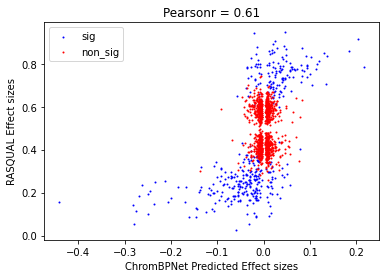

In [255]:
import numpy as np

non_sig_r = non_sig.sample(1000)
plt.scatter(preds["probs_jsd_diff"], preds["Effect_size"].astype(float), s=1, c="b", label="sig")

plt.scatter(non_sig_r["probs_jsd_diff"], non_sig_r["Effect_size"].astype(float), s=1, c="r", label="non_sig")



plt.xlabel("ChromBPNet Predicted Effect sizes")
plt.ylabel("RASQUAL Effect sizes")
plt.legend()
plt.title("Pearsonr = "+str(np.round(pearsonr(preds["probs_jsd_diff"], preds["Effect_size"].astype(float))[0],2)))


In [200]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import metrics



In [201]:
labels = [1]*preds.shape[0]+[0]*non_sig.shape[0]
labels=np.array(labels)

30997 386


Text(0, 0.5, 'Precision')

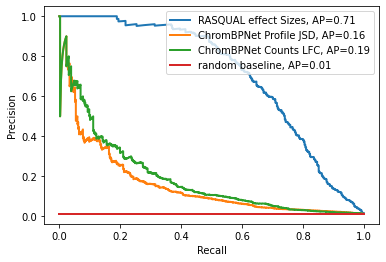

In [202]:

import random

in1 = list(labels)
random.shuffle(in1)
in1=np.array(in1)


predictions = preds["Effect_size"].tolist()+non_sig["Effect_size"].tolist()

fpr_random, tpr_random, _ = precision_recall_curve(labels, abs(np.array(predictions)-0.5))
roc_auc = metrics.average_precision_score(labels, abs(np.array(predictions)-0.5))
plt.plot(tpr_random, fpr_random, linewidth=2, label="RASQUAL effect Sizes, AP="+str(round(roc_auc,2)))



predictions = preds["probs_jsd_diff"].tolist()+non_sig["probs_jsd_diff"].tolist()

fpr_random, tpr_random, _ = precision_recall_curve(labels, np.abs(predictions))
roc_auc = metrics.average_precision_score(labels, np.abs(predictions))
plt.plot(tpr_random, fpr_random, linewidth=2, label="ChromBPNet Profile JSD, AP="+str(round(roc_auc,2)))

predictions = preds["log_counts_diff"].tolist()+non_sig["log_counts_diff"].tolist()

fpr_random, tpr_random, _ = precision_recall_curve(labels, np.abs(predictions))
roc_auc = metrics.average_precision_score(labels, np.abs(predictions))
plt.plot(tpr_random, fpr_random, linewidth=2, label="ChromBPNet Counts LFC, AP="+str(round(roc_auc,2)))



fpr_random, tpr_random, _ = precision_recall_curve(labels, in1)
roc_auc = metrics.average_precision_score(labels, in1)
plt.plot(tpr_random, [sum(labels==1)/len(labels)]*len(fpr_random), linewidth=2, label="random baseline, AP="+str(round(roc_auc,2)))

print(len(labels), sum(labels==1))
plt.legend(loc='upper right')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [203]:
non_sig.columns

Index(['CHR', 'POS0', 'POS1', 'REF', 'ALT', 'META_DATA', 'log_counts_diff',
       'log_probs_diff_abs_sum', 'probs_jsd_diff', 'Feature_ID', 'rsID',
       'Chromosome', 'SNP_position', 'Ref_allele', 'Alt_allele', 'Freq',
       'HWE_Chisquare', 'Imp_quality', 'Log10_BH_Q', 'Chisquare',
       'Effect_size', 'Delta', 'Phi', 'Overdispersion', 'SNP_id_region',
       'Num_feature_SNPs', 'Num_tested_SNPs', 'Num_iterations_null',
       'Num_iterations_alt', 'Random_ties', 'Log_likelihood_null',
       'Convergence_status', 'Sq_corr_fSNPs', 'Sq_corr_rSNP'],
      dtype='object')

In [222]:
import pandas as pd

snps_all=pd.read_csv("/oak/stanford/groups/akundaje/projects/cad/data/clint_data/rasqual_results/revisions/smc/SMC_rasqual_results_FDR_0.05_083121.txt", sep="\t", header=0)

all_preds = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0_all/snp_scores.tsv", sep="\t", header=0)

In [223]:
all_preds.head()
all_preds[snps_all.columns[0:25]] = all_preds["META_DATA"].str.split(",", expand=True)


In [225]:
print(all_preds.columns)

Index(['CHR', 'POS0', 'REF', 'ALT', 'META_DATA', 'log_counts_diff',
       'log_probs_diff_abs_sum', 'probs_jsd_diff', 'Feature_ID', 'rsID',
       'Chromosome', 'SNP_position', 'Ref_allele', 'Alt_allele', 'Freq',
       'HWE_Chisquare', 'Imp_quality', 'Log10_BH_Q', 'Chisquare',
       'Effect_size', 'Delta', 'Phi', 'Overdispersion', 'SNP_id_region',
       'Num_feature_SNPs', 'Num_tested_SNPs', 'Num_iterations_null',
       'Num_iterations_alt', 'Random_ties', 'Log_likelihood_null',
       'Convergence_status', 'Sq_corr_fSNPs', 'Sq_corr_rSNP'],
      dtype='object')


(array([0, 1, 2, 3]),
 [Text(0, 0, '(-41.136, -31.136]'),
  Text(1, 0, '(-31.136, -21.136]'),
  Text(2, 0, '(-21.136, -11.136]'),
  Text(3, 0, '(-11.136, -1.136]')])

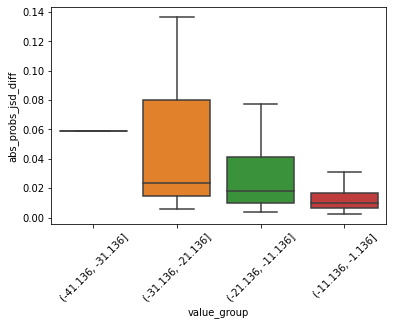

In [250]:
#bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])

import seaborn as sns
#bqtls_atac['value_group'] = pd.cut(bqtls_atac["pvalue"].astype(np.float64), bins=bins)

bins = np.arange(np.min(preds["Log10_BH_Q"])-1,np.max(preds["Log10_BH_Q"])+10,10)
#bins = [0,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
#bins = []
all_preds['value_group'] = pd.cut(all_preds["Log10_BH_Q"].astype(np.float64), bins=bins)

all_preds['abs_probs_jsd_diff'] = np.abs(all_preds['probs_jsd_diff'])


ax = sns.boxplot(x="value_group", y="abs_probs_jsd_diff", data=all_preds, showfliers=False)
plt.xticks(rotation=45)

#medians = all_preds.groupby(['Log10_BH_Q'])['abs_probs_jsd_diff'].median().values
#nobs= bqtls_atac['abs_probs_jsd_diff'].value_counts().values[::-1]
#nobs = [str(x) for x in nobs.tolist()]
#nobs = ["n: " + i for i in nobs] 
#print(nobs)
#pos = range(len(nobs))
#for tick,label in zip(pos,ax.get_yticklabels()):
#    ax.text(tick+0.1,medians[tick]+0.07,nobs[tick],color='black', verticalalignment = "bottom",rotation=90)
#sns.despine()
#ax.set(xlabel='p-value intervals', ylabel='Predicted')

In [241]:
np.max(preds["Log10_BH_Q"])

-2.8858271848